# a. Compute the means of the 5 assets, the standard deviations, and the variance covariance matrix.

## mean

In [166]:
r_m  

array([-0.00682405,  0.0177509 ,  0.01694461,  0.0122591 ,  0.01671522])

## standard deviations

In [171]:
np.sqrt(np.diag(cm))

array([ 0.05778373,  0.0714154 ,  0.06146442,  0.07448161,  0.0410075 ])

## variance covariance matrix

In [170]:
cm

array([[ 0.00333896,  0.00133757,  0.00053782,  0.00118404,  0.00057991],
       [ 0.00133757,  0.00510016,  0.00230156,  0.00189162,  0.0005345 ],
       [ 0.00053782,  0.00230156,  0.00377788,  0.00167963,  0.00084225],
       [ 0.00118404,  0.00189162,  0.00167963,  0.00554751,  0.0002975 ],
       [ 0.00057991,  0.0005345 ,  0.00084225,  0.0002975 ,  0.00168161]])

# b. Plot the 5 assets on the space expected return against standard deviation.

Text(0.5,0,'risk (standard deviation )')

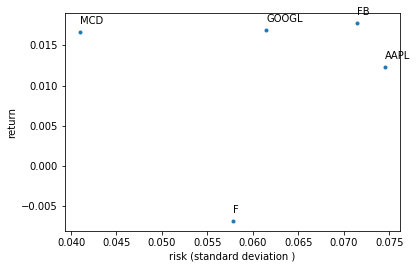

# c. Assume equal allocation portfolio using the 5 stocks. Compute the mean and standard deviation of this portfolio and add it on the plot of question (b).

Text(0.5,0,'standard deviation')

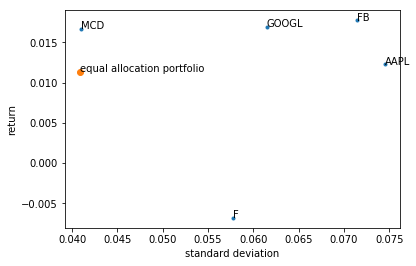

# d. Add on the plot the minimum risk portfolio.

Text(0.5,0,'risk (standard deviation) ')

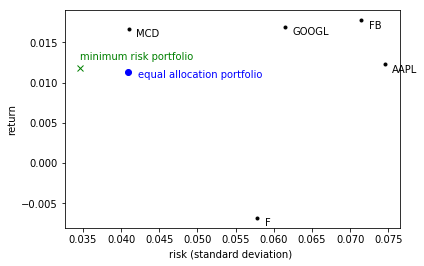

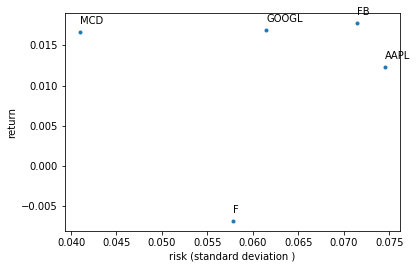

In [183]:
q_b()

In [180]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random


csvfilename="stockData2.csv"


def readfile(csvfilename):
    a=pd.read_csv(csvfilename) 
    stocknamelist=a.columns.tolist()[2:]
    m=a[stocknamelist].values
    T=m.shape[0]
    N=m.shape[1]
    r=(m[1:T,:]-m[0:T-1,:])/m[0:T-1,:]
    r=np.array(r)

    ## covariant matrix
    cm=np.cov(r,rowvar=False)
    return N,stocknamelist,cm 

def inComatrix_outMinvarianX(m):
    n=len(m[0])
    allone=np.array([1]*n)
    
    
    minv = inv(m)
    
    return np.matmul(minv,allone)/ np.matmul( allone, np.matmul(minv,allone)   )


def q_b():
    r_m=np.mean(r,axis=0)
    s_m=np.sqrt(np.diag(cm))
    plt.plot(s_m,r_m,'.')

    for i in range(5):
        plt.annotate(st[i], (s_m[i], r_m[i]+0.001))
    plt.ylabel('return')
    plt.xlabel('risk (standard deviation )')
def q_c():
    x=np.array([0.2]*5)
    s_x=np.sqrt(np.matmul(x,np.matmul(cm,x)))
    r_x=np.matmul(x,r_m)

    r_m=np.mean(r,axis=0)
    s_m=np.sqrt(np.diag(cm))
    plt.plot(s_m,r_m,'.')
    plt.plot(s_x,r_x,'o')
    for i in range(5):
        plt.annotate(st[i], (s_m[i], r_m[i]))

    plt.annotate("equal allocation portfolio",(s_x,r_x))
    plt.ylabel('return')
    plt.xlabel('standard deviation')
def q_d():
    r_m=np.mean(r,axis=0)
    s_m=np.sqrt(np.diag(cm))

    x_min=inComatrix_outMinvarianX(cm)
    r_min=np.matmul(x_min,r_m)
    s_min=np.sqrt( np.matmul(x_min,np.matmul(cm,x_min)) )

    plt.plot(s_m,r_m,'.',color='black')
    plt.plot(s_x,r_x,'o',color='b')
    plt.plot(s_min,r_min,'x',color='g')
    plt.plot()

    for i in range(5):
        plt.annotate(st[i], (s_m[i]+0.001, r_m[i]-0.001))

    plt.annotate("equal allocation portfolio",(s_x+0.0013,r_x-0.0008),color='b')
    plt.annotate("minimum risk portfolio",(s_min+0.000,r_min+0.001),color='g')

    plt.ylabel('return')
    plt.xlabel('risk (standard deviation) ')
    
    
def NrandomSum2one(N):
    
    